In [4]:
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os
import pylab
import matplotlib.pyplot as plt
data = pd.read_csv('trainingSet.csv')
data_test = pd.read_csv('testSet.csv')
t_frac = 0
F = [0.01, 0.1, 0.2, 0.5, 0.6, 0.75, 0.9, 1]
def getdict(key,val):
    dict_sub = {}
    for j in range(len(key)):
        dict_sub[key[j]] = float(val[j])/sum(val) 
    return dict_sub

dict_final={}
def getdictfinal_yes(df,list_col):
    for i in list_col: 
        key =  df[i].value_counts().keys().tolist()
        val = df[i].value_counts().tolist()
        dict_sub = getdict(key,val)
        dict_final[i]=dict_sub
    return dict_final

def getdict(key,val):
    dict_sub = {}
    for j in range(len(key)):
        dict_sub[key[j]] = float(val[j])/sum(val) 
    return dict_sub

dict_final1={}
def getdictfinal_no(df1,list_col):
    for i in list_col: 
        key1 =  df1[i].value_counts().keys().tolist()
        val1 = df1[i].value_counts().tolist()
        dict_sub = getdict(key1,val1)
        dict_final1[i]=dict_sub
    return dict_final1

def nbc(t_frac,data):
    train=data.sample(random_state=47,frac=t_frac)
    train_yes = train[train['decision'] == 1] 
    train_no = train[train['decision'] == 0]
    list_col =  list(data.columns)
    list_col_full =  list(data.columns)
    list_col.remove('decision')
    dict_yes = getdictfinal_yes(train_yes,list_col)
    dict_no = getdictfinal_no(train_no,list_col)
    return dict_yes,dict_no
dict_yes,dict_no = nbc(t_frac,data)

def calc_conditional_prob(df,yes_or_no_prob,list_col):
    df['new']=1
    for i in list_col:
        df['new'] = df['new'] * df[i]
    df['new'] = df['new'] * yes_or_no_prob
    return df['new']

def getaccuracy(df,dict_yes,dict_no,list_col):
    yes_prob = float((df.decision==1).sum())/((df.decision==1).sum()+(df.decision==0).sum())
    no_prob = 1 -yes_prob
    mod_yes = df[list_col]    
    for i in list_col:
        mod_yes[i] = mod_yes[i].map(dict_yes[i]) 
    
    mod_no = df[list_col]
    for i in list_col:
        mod_no[i] = mod_no[i].map(dict_no[i])
    df['conditionalyes'] = calc_conditional_prob(mod_yes,yes_prob,list_col)
    df['conditionalno'] = calc_conditional_prob(mod_no,no_prob,list_col)
    df['prediction'] = 0
    df.loc[(df['conditionalyes'] >= df['conditionalno']), 'prediction'] = 1
    df['accuracy'] = abs(df['decision']-df['prediction'])
    accuracy =  round(float((df.accuracy==0).sum())/((df.accuracy==0).sum()+(df.accuracy==1).sum()),2)
    return accuracy
training_acc = []
test_acc=[]
for i in F:
    print "Fraction of training data:",i
    list_col =  list(data.columns.values)
    data_train = data[list_col]
    list_col.remove('decision')    
    dict_yes,dict_no = nbc(i,data_train)
    Train_accuracy= getaccuracy(data_train,dict_yes,dict_no,list_col)
    print "Training Accuracy:", Train_accuracy
    Test_accuracy= getaccuracy(data_test,dict_yes,dict_no,list_col)
    print "Test Accuracy:", Test_accuracy
    training_acc.append(Train_accuracy)
    test_acc.append(Test_accuracy)

Fraction of training data: 0.01
Training Accuracy: 0.58
Test Accuracy: 0.58
Fraction of training data: 0.1
Training Accuracy: 0.68
Test Accuracy: 0.68
Fraction of training data: 0.2
Training Accuracy: 0.71
Test Accuracy: 0.7
Fraction of training data: 0.5
Training Accuracy: 0.75
Test Accuracy: 0.73
Fraction of training data: 0.6
Training Accuracy: 0.75
Test Accuracy: 0.73
Fraction of training data: 0.75
Training Accuracy: 0.75
Test Accuracy: 0.74
Fraction of training data: 0.9
Training Accuracy: 0.76
Test Accuracy: 0.74
Fraction of training data: 1
Training Accuracy: 0.76
Test Accuracy: 0.74


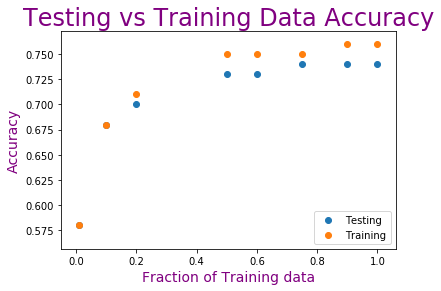

In [8]:
x = F
y0 = training_acc
y =  test_acc
area = np.pi*10
plt.scatter(x, y, label = 'Testing')
plt.scatter(x, y0, label = 'Training')
plt.title('Testing vs Training Data Accuracy',fontsize=24,color='purple')
plt.xlabel('Fraction of Training data',fontsize=14,color='purple')
plt.ylabel('Accuracy',fontsize=14,color='purple')
plt.legend(loc='lower right')
plt.savefig('Fig-5_3.png')
#plt.show()
plt.close()